In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

### READ DATASET

In [13]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Analyse DATA

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


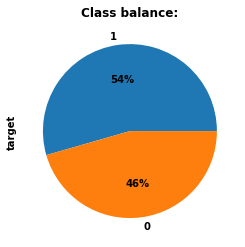

In [16]:
df.target.value_counts().plot(kind='pie', autopct='%1.0f%%', title='Class balance:');

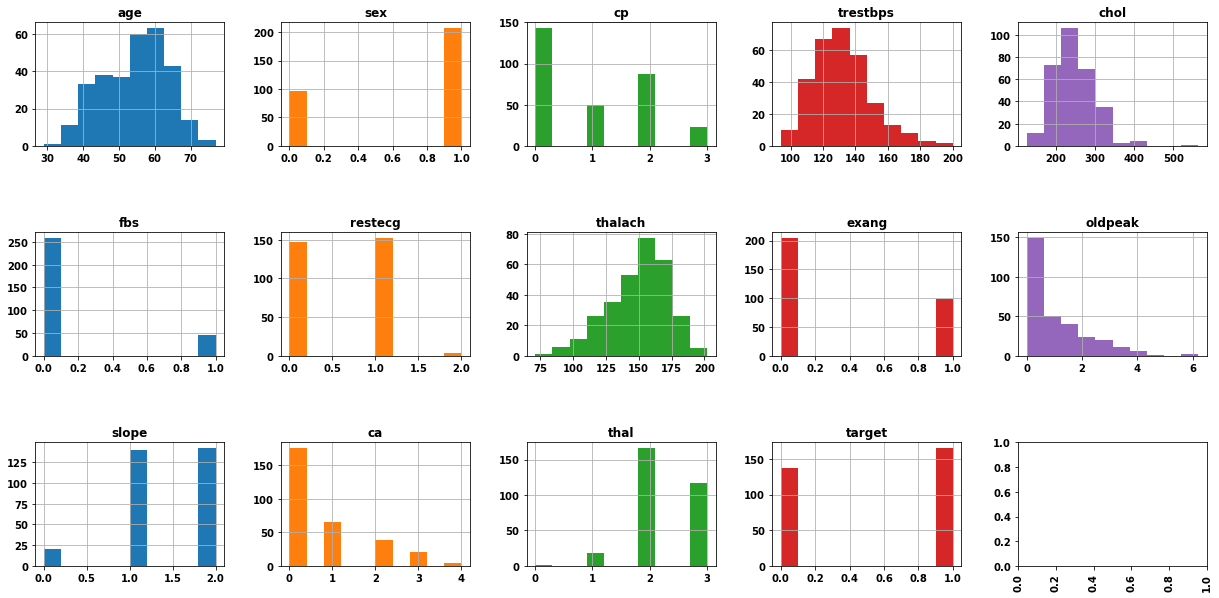

In [17]:
df_visual = df
cols = 5
rows = int(np.ceil(float(df_visual.shape[1])/cols))
fig, axes = plt.subplots(rows, cols, figsize=(21,10))
for i, name_col in enumerate(df_visual.columns):
    row = i // cols
    col = i % (cols)
    ax = axes[row, col]
    ax.set_title(name_col)
    df_visual[name_col].hist(ax=ax,color='C'+str(i%cols))
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.3) 
del df_visual

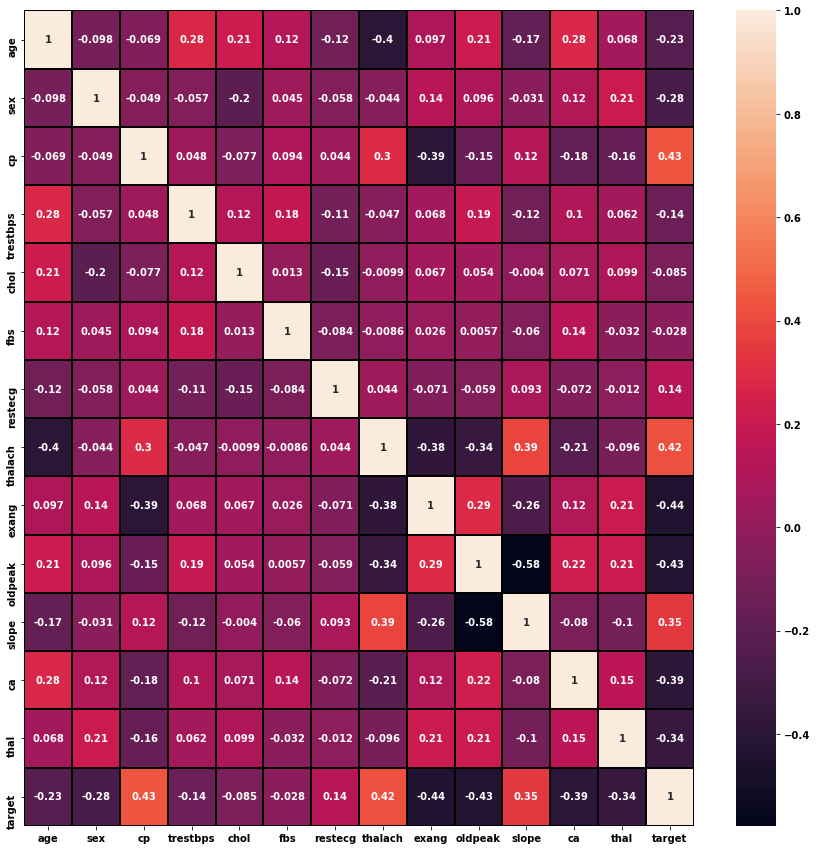

In [18]:
f, ax = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black');

### Make features:

In [19]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Split data:

In [20]:
X = df.drop(columns='target')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

### Fit models:

In [21]:
models = [("LR", Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])),
            ("Forest", Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])),
            ("GBC", Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier())]))
            ]

In [22]:
for cur_model in models:
    cur_model[1].fit(X_train, y_train)
    print(f"model {cur_model[0]} score: {round(cur_model[1].score(X_test, y_test),3)}")

model LR score: 0.852
model Forest score: 0.82
model GBC score: 0.852


In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [55]:
from faker import Faker
from collections import OrderedDict

In [26]:
fake_data = Faker()

In [86]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [88]:
age = np.random.randint(29, 77, size = 200, dtype = 'int')
sex = np.random.randint(0,2, size = 200, dtype = 'int')
cp = np.random.randint(0,4, size = 200, dtype = 'int')
trestbps = np.random.randint(94,201, size = 200, dtype = 'int')
chol = np.random.randint(126,565, size = 200, dtype = 'int')
fbs = fake_data.random_elements(
    elements=OrderedDict([
        (0, 0.75),
        (1, 0.25),
    ]), unique=False, length=200
)

restecg = fake_data.random_elements(
    elements=OrderedDict([
        (0, 0.48),
        (1, 0.48),
        (2, 0.04),
    ]), unique=False, length=200
)

thalach = np.random.randint(71,203, size = 200, dtype = 'int')

exang = fake_data.random_elements(
    elements=OrderedDict([
        (0, 0.75),
        (1, 0.25),
    ]), unique=False, length=200
)

oldpeak = []
for _ in range(200):
    oldpeak.append(round(np.random.uniform(0., 6.2),1))
    
slope = fake_data.random_elements(
    elements=OrderedDict([
        (0, 0.1),
        (1, 0.45),
        (2, 0.45),
    ]), unique=False, length=200
)    

ca = fake_data.random_elements(
    elements=OrderedDict([
        (0, 0.5),
        (1, 0.3),
        (2, 0.15),
        (3, 0.05),
    ]), unique=False, length=200
)

thal = fake_data.random_elements(
    elements=OrderedDict([
        (0, 0.1),
        (1, 0.2),
        (2, 0.4),
        (3, 0.3), 
    ]), unique=False, length=200
)

target = np.random.randint(0,2, size = 200, dtype = 'int')

In [90]:
df_fake = pd.DataFrame(list(zip(age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                            exang, oldpeak, slope, ca, thal, target)),
                   columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',\
                              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

In [99]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',\
                              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [103]:
assert len(set(columns) - set(df_fake.columns)) == 0

In [102]:
(set(columns) - set(df_fake.columns)) 

set()

In [97]:
df_fake.to_csv('df_fake.csv', index=False)